In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import matplotlib

# Data visu 

In [2]:
#data importation 
data = pd.read_csv("datas/simulated_4K_cloud_gaming_dataset.csv")

print("dataframe information gathering ")

print (data.head())
print (data.index)
print (data.columns)
print (data.dtypes)
print (data.info())
print (data.describe())




dataframe information gathering 
   CPU_usage  GPU_usage  Bandwidth_MBps  Latency_ms  FrameRate_fps  Jitter_ms  \
0         71         65       19.770323   66.202388      59.107060  13.085300   
1         34         40        8.092595   32.207380      57.969683   8.567330   
2         91         55       16.841666  133.478904      52.248079   1.129479   
3         80         73       15.702267  125.328933      38.382477  10.944737   
4         40         76       11.227322  111.041017      33.949608  18.508754   

   QoE_score  
0          3  
1          3  
2          1  
3          1  
4          2  
RangeIndex(start=0, stop=1000, step=1)
Index(['CPU_usage', 'GPU_usage', 'Bandwidth_MBps', 'Latency_ms',
       'FrameRate_fps', 'Jitter_ms', 'QoE_score'],
      dtype='object')
CPU_usage           int64
GPU_usage           int64
Bandwidth_MBps    float64
Latency_ms        float64
FrameRate_fps     float64
Jitter_ms         float64
QoE_score           int64
dtype: object
<class 'pandas.co

# Data Cleaning 

In [3]:
print (data.shape)

(1000, 7)


In [4]:
data = data.dropna()
data = data.drop_duplicates()

In [5]:
print (data.shape)

(1000, 7)


# Visualisation

In [6]:
print(data['QoE_score'].value_counts())

QoE_score
3    379
2    312
1    222
4     84
5      3
Name: count, dtype: int64


## Déséquilibre des classes (ou des notes de QoE à gérer)

<Figure size 1000x600 with 0 Axes>

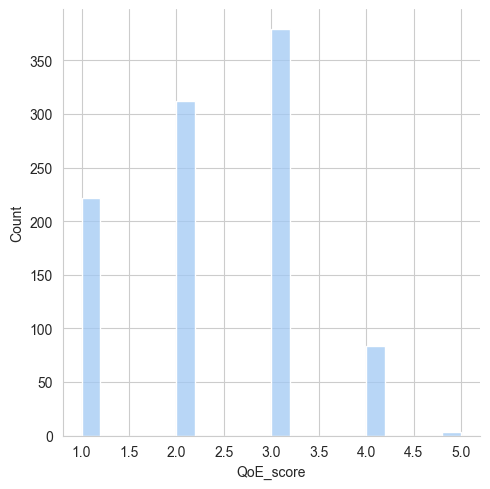

In [7]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.displot(data['QoE_score'])
plt.show()

### View of key features 

<Axes: xlabel='QoE_score', ylabel='Latency_ms'>

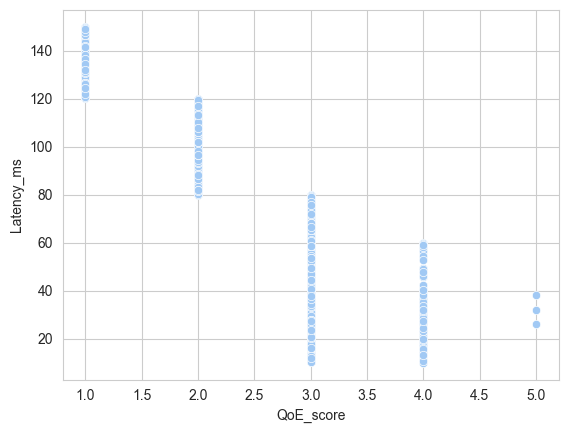

In [8]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'Latency_ms')

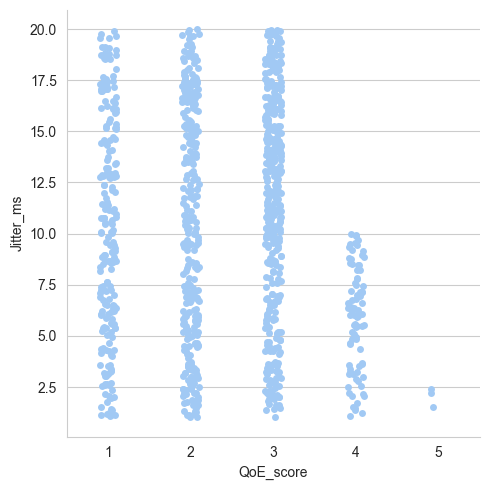

In [9]:
sns.catplot(data= data, x='QoE_score', y = 'Jitter_ms')

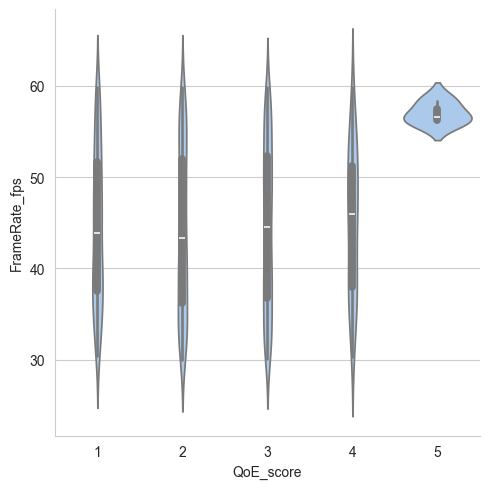

In [10]:
sns.catplot(data= data,kind='violin', x='QoE_score', y = 'FrameRate_fps')

<Axes: xlabel='QoE_score', ylabel='Bandwidth_MBps'>

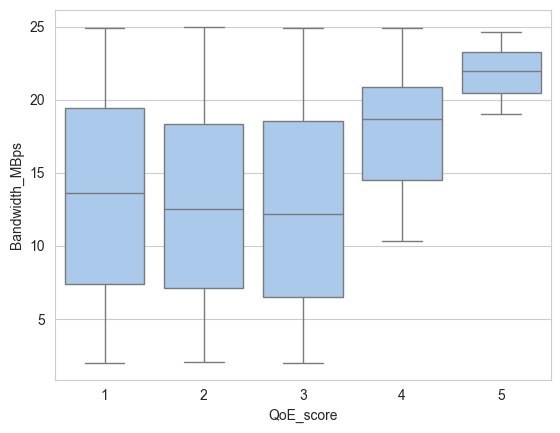

In [11]:
sns.boxplot(data=data, x='QoE_score', y= 'Bandwidth_MBps')

<Axes: xlabel='QoE_score', ylabel='CPU_usage'>

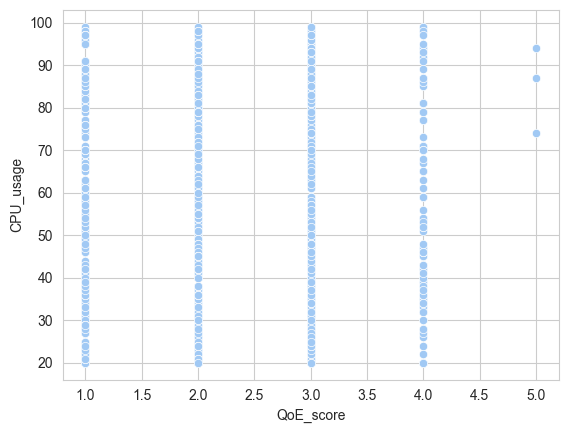

In [12]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'CPU_usage')


<Axes: xlabel='QoE_score', ylabel='GPU_usage'>

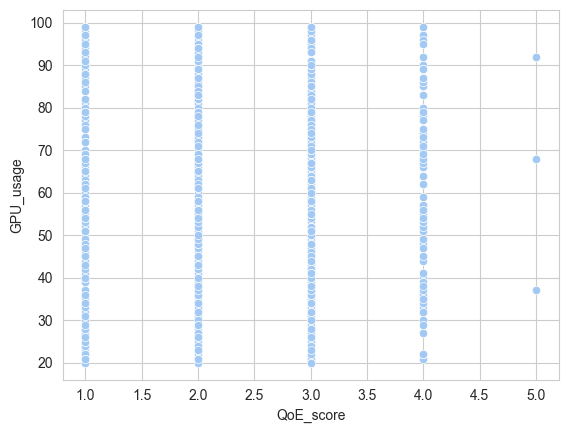

In [13]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'GPU_usage')


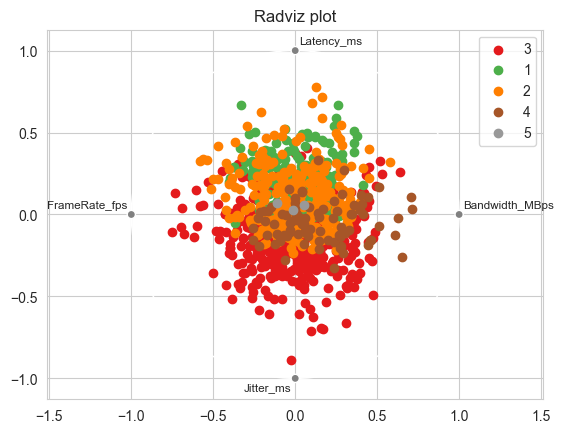

In [14]:
from pandas.plotting import radviz 

cols = ['Bandwidth_MBps', 'Latency_ms', 'FrameRate_fps', 'Jitter_ms', 'QoE_score']
radviz(data[cols], class_column='QoE_score', colormap='Set1')
plt.title('Radviz plot')
plt.show()


## Corrélation des données 

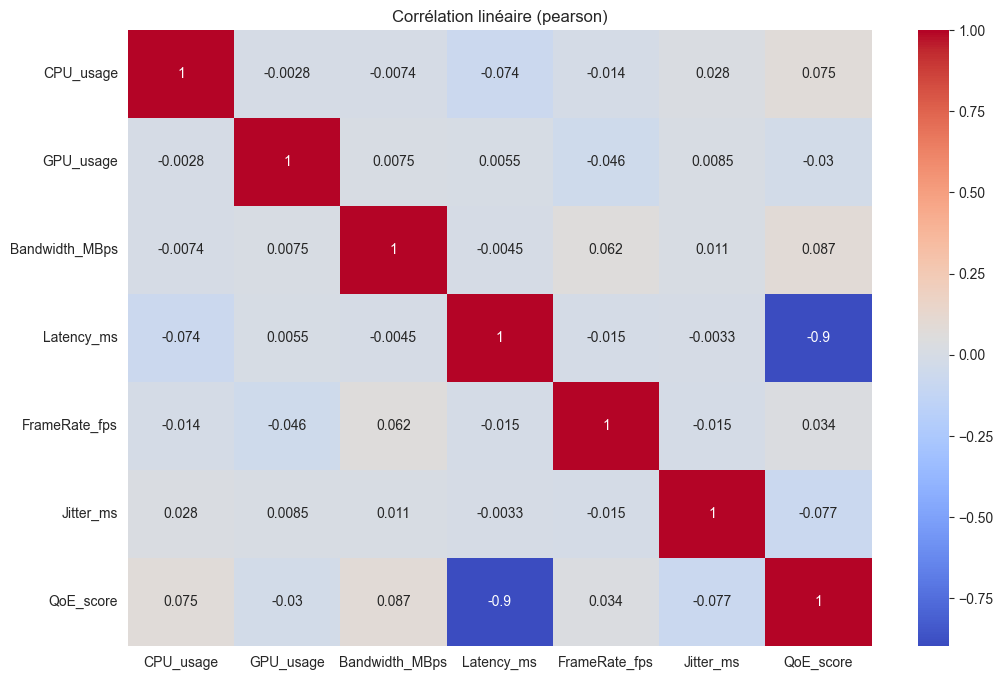

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Corrélation linéaire (pearson)')
plt.show()

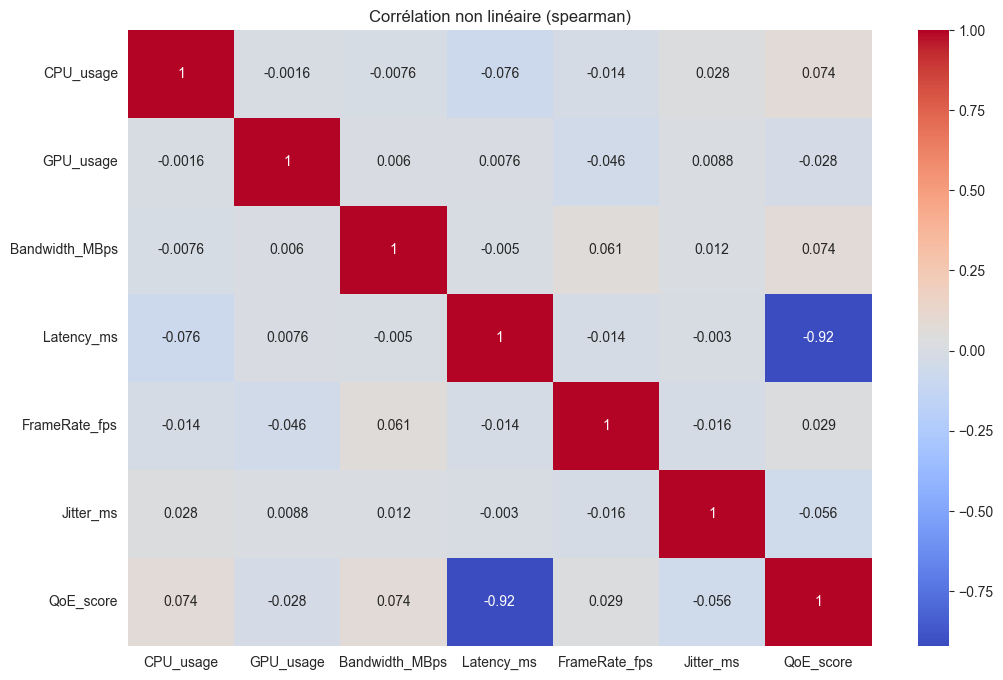

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Corrélation non linéaire (spearman)')
plt.show()

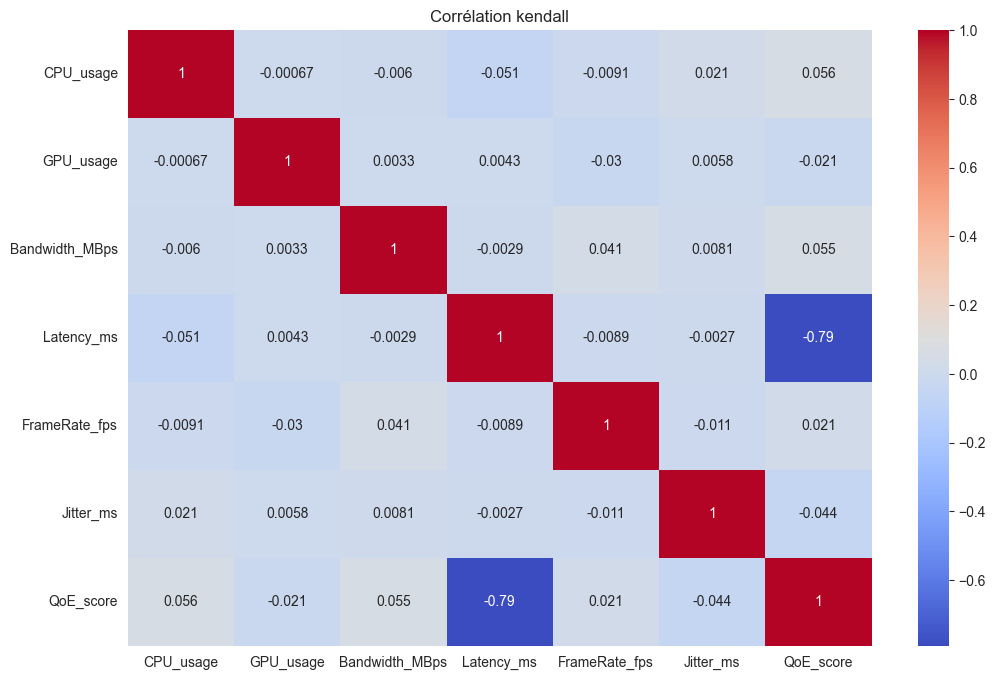

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='kendall'), annot=True, cmap='coolwarm')
plt.title('Corrélation kendall')
plt.show()